# Pymaceuticals Inc.

### Analysis

-  OBSERVED TREND 1: Ramicane was most effective in reducing the Tumor volume [to approx. 35 (mm3)]

-  OBSERVED TREND 2: Ramicane was the most effective drug as it had-  
                        1. Better survival rate (only next to Capomulin)
                        2. Maximum Tumor reduction 
                        3. Lowest Metastatic Spread

-  OBSERVED TREND 3: Capomulin was the next (2nd) most effective drug as it had-  
                        1. Best survival rate
                        2. Better Tumor reduction (only next to Ramicane)
                        3. Lower Metastatic Spread (only next to Ramicane)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import trunc

clcTrlData = pd.read_csv('raw_data/clinicaltrial_data.csv')
mouDrgData = pd.read_csv('raw_data/mouse_drug_data.csv')

In [2]:
merged_data = pd.merge(clcTrlData, mouDrgData, on="Mouse ID")
marker_lst = ['o','x','8','s','p','*','v','+','d','^']
color_lst = ['lightcoral','gold','skyblue','r','c','m','y','k','g','b']

## Tumor Response to Treatment

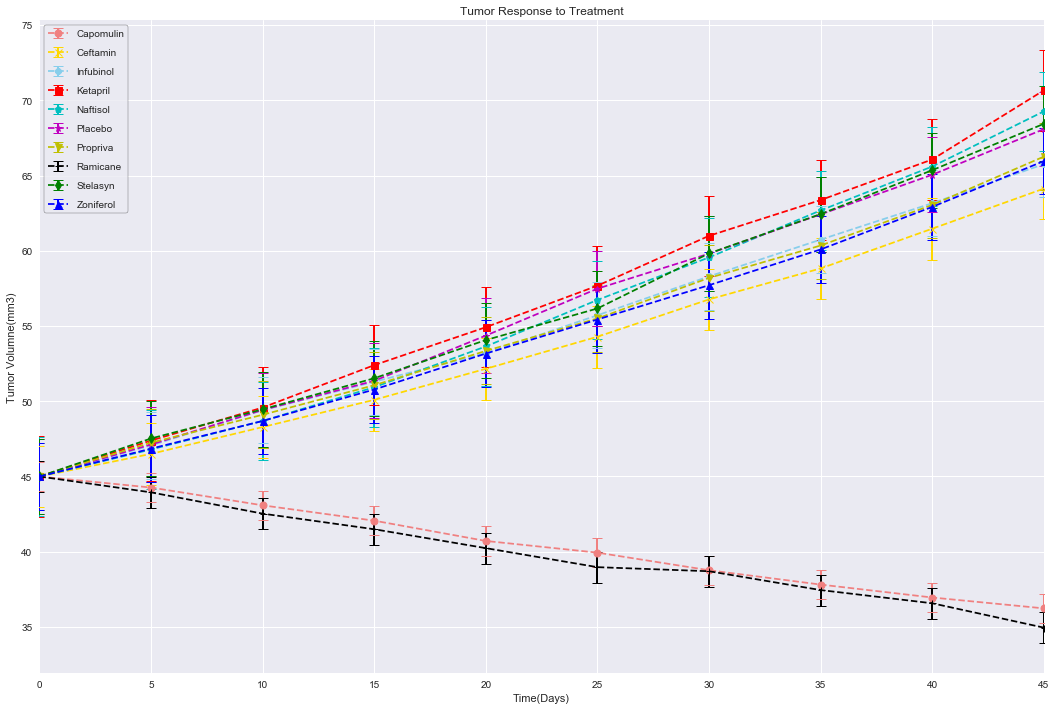

In [3]:
tr_pivot = pd.pivot_table(merged_data, index='Timepoint', columns='Drug', values='Tumor Volume (mm3)', aggfunc=np.mean)
plt.figure(figsize=(18,12))
i=0
for column_nm in tr_pivot.columns:
    plt.errorbar(tr_pivot.index, tr_pivot[column_nm], yerr=tr_pivot[column_nm].sem(), marker=marker_lst[i],linestyle='--',label=column_nm, capsize=5, elinewidth=2, markeredgewidth=1, color=color_lst[i])
    i = i + 1
plt.gca().set(xlabel='Time(Days)', ylabel='Tumor Volumne(mm3)', title='Tumor Response to Treatment', xlim=(0,max(tr_pivot.index)))
plt.legend(loc="best", frameon=True, edgecolor='black', labelspacing=1)
plt.show()

## Metastatic Response to Treatment

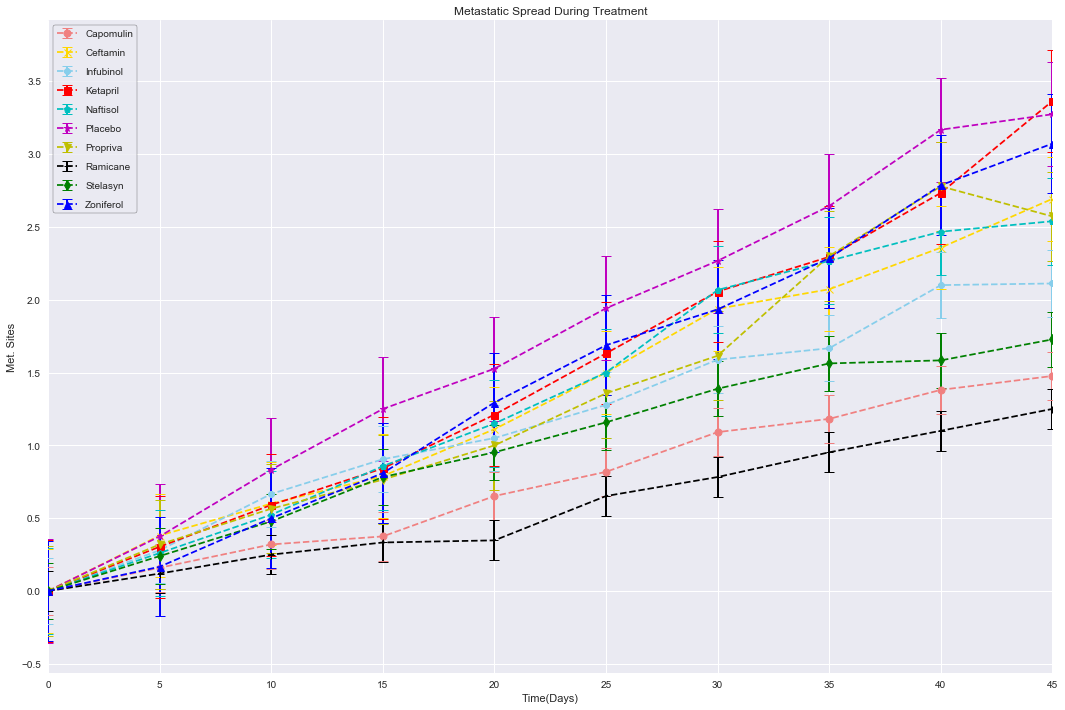

In [4]:
mr_pivot = pd.pivot_table(merged_data, index='Timepoint', columns='Drug', values='Metastatic Sites', aggfunc=np.mean)
plt.figure(figsize=(18,12))
i=0
for column_nm in mr_pivot.columns:
    plt.errorbar(mr_pivot.index, mr_pivot[column_nm], yerr=mr_pivot[column_nm].sem(), marker=marker_lst[i],linestyle='--',label=column_nm, capsize=5, elinewidth=2, markeredgewidth=1, color=color_lst[i])
    i = i + 1
plt.gca().set(xlabel='Time(Days)', ylabel='Met. Sites', title='Metastatic Spread During Treatment', xlim=(0,max(mr_pivot.index)))
plt.legend(loc="best", frameon=True, edgecolor='black', labelspacing=1)
plt.show()

## Survival Rates

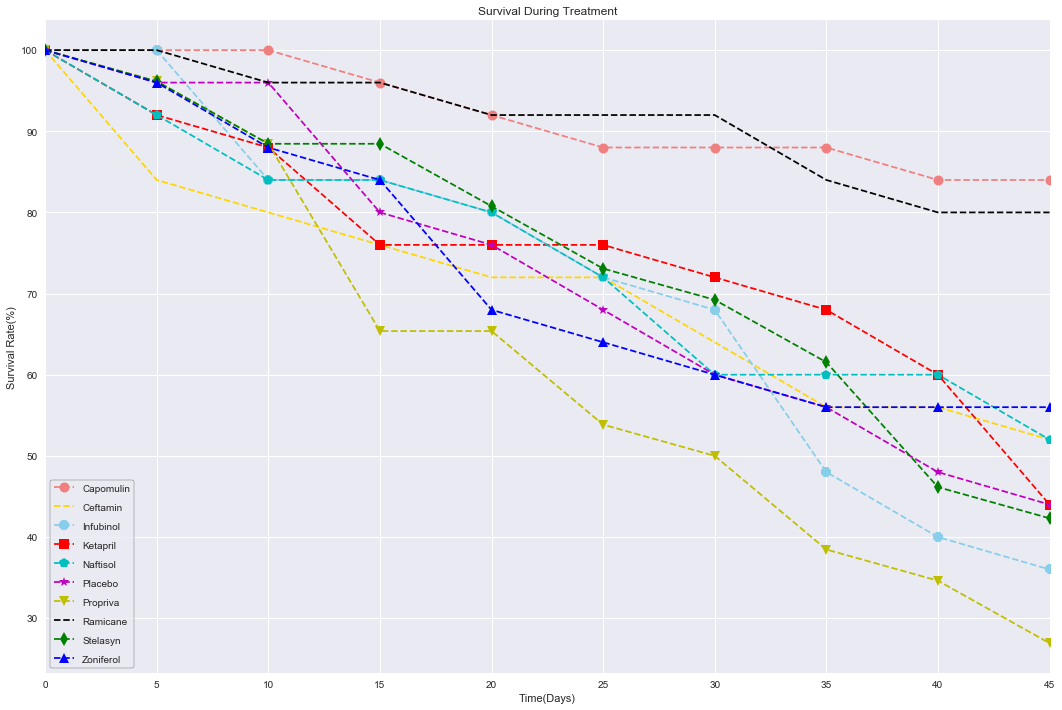

In [5]:
sr_df = merged_data.groupby(['Drug','Timepoint'])[['Mouse ID']].count()
sr_pivot = pd.pivot_table(sr_df, index='Timepoint', columns='Drug', values='Mouse ID', aggfunc=np.mean)
sr_pivot = round(sr_pivot.apply(lambda c: c / c.max() * 100, axis=0),2)
plt.figure(figsize=(18,12))
i=0
for column_nm in sr_pivot.columns:
    plt.plot(sr_pivot.index, sr_pivot[column_nm], marker=marker_lst[i], markersize=10, linestyle='--',label=column_nm,color=color_lst[i])
    i = i + 1
plt.gca().set(xlabel='Time(Days)', ylabel='Survival Rate(%)', title='Survival During Treatment', xlim=(0,max(sr_pivot.index)))
plt.legend(loc="best", frameon=True, edgecolor='black', labelspacing=1)
plt.show()

## Summary Bar Graph

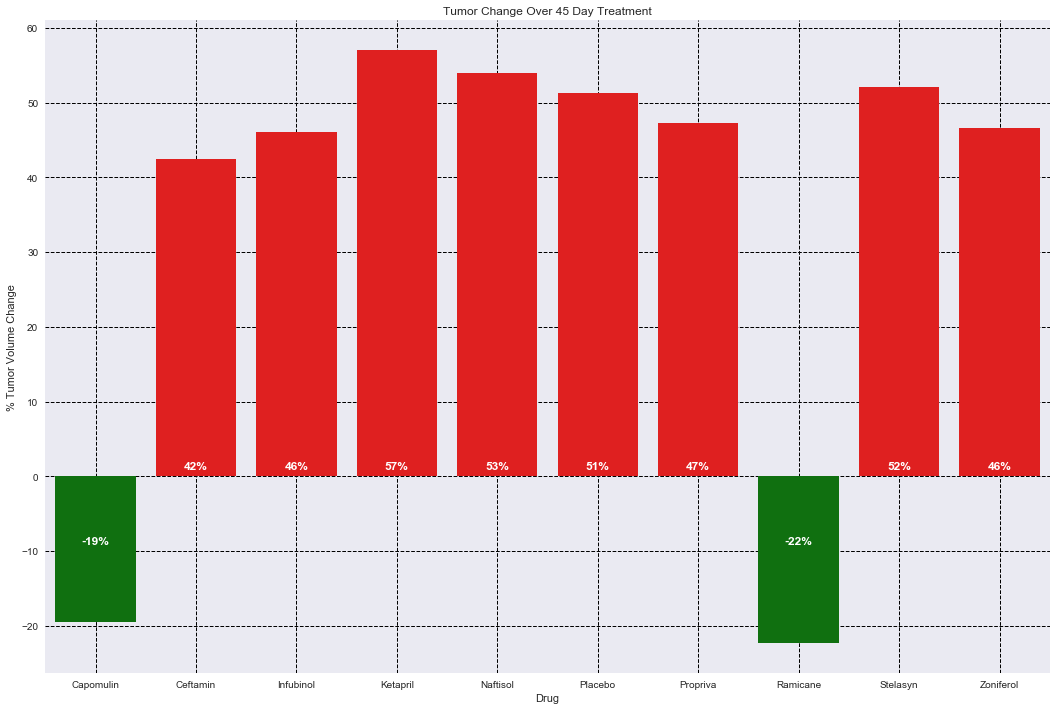

In [6]:
tvc = []
for column_nm in tr_pivot.columns:
    tvc.append(round((((tr_pivot[column_nm][45] - tr_pivot[column_nm][0]) / tr_pivot[column_nm][0]) * 100), 2)  ) 
sbg = pd.DataFrame({'%Tumor Volume Change': tvc},
                   index=tr_pivot.columns)
x=sbg.index
y=sbg['%Tumor Volume Change']
plt.figure(figsize=(18,12))
colors = ['red' if _y >=0 else 'green' for _y in y]
ax = sns.barplot(x, y, palette=colors)
for n, (label, _y) in enumerate(zip(x, y)):
    if _y <= 0:
        ax.annotate(
            s='{:d}%'.format(trunc(_y)), xy=(n, -10), ha='center',va='center',
            xytext=(0,10), color='w', textcoords='offset points', weight='bold')
    else:
        ax.annotate(
            s='{:d}%'.format(trunc(_y)), xy=(n, 0), ha='center',va='center',
            xytext=(0,10), color='w', textcoords='offset points', weight='bold')  
plt.gca().set(xlabel='Drug', ylabel='% Tumor Volume Change', title='Tumor Change Over 45 Day Treatment')
plt.grid(which='major', axis='both', linestyle='--', linewidth=1, color='k')
plt.show()